In [ ]:
!mkdir car-persian-plate-detection
!cd car-persian-plate-detection

In [ ]:
!wget -O plate-dataset-5000-2145.rar https://speedxstream.herokuapp.com/590522/plate-dataset-5000-2145.rar?hash=AgAD8A

--2022-07-06 05:19:51--  https://speedxstream.herokuapp.com/590522/plate-dataset-5000-2145.rar?hash=AgAD8A
Resolving speedxstream.herokuapp.com (speedxstream.herokuapp.com)... 54.208.186.182, 54.243.129.215, 34.201.81.34, ...
Connecting to speedxstream.herokuapp.com (speedxstream.herokuapp.com)|54.208.186.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104386198 (100M) [application/rar]
Saving to: ‘plate-dataset-5000-2145.rar’

plate-dataset-5000- 100%[===================>]  99.55M  2.66MB/s    in 29s     

2022-07-06 05:20:20 (3.44 MB/s) - ‘plate-dataset-5000-2145.rar’ saved [104386198/104386198]



In [ ]:
password='H@@shB@x@ir'

In [ ]:
!unrar x -Y "/content/plate-dataset-5000-2145.rar"

Streaming output truncated to the last 5000 lines.
labels/377.json - use current password ?
Extracting  labels/377.json                                               98%  OK 
labels/3770.json - use current password ?
Extracting  labels/3770.json                                              98%  OK 
labels/3772.json - use current password ?
Extracting  labels/3772.json                                              98%  OK 
labels/3773.json - use current password ?
Extracting  labels/3773.json                                              98%  OK 
labels/3774.json - use current password ?
Extracting  labels/3774.json                                              98%  OK 
labels/3775.json - use current password ?
Extracting  labels/3775.json                                              98%  OK 
labels/3777.json - use current password ?
Extracting  labels/3777.json                                              98%  OK 
labels/3779.

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# json to txt yolo format


import json
labelpath='/content/labels'
imagepath='/content/images'

def extract_info_from_jason(jason_file):
    # Opening JSON file
    f = open(f'{labelpath}/{jason_file[:-5]}.json')
    img=f'{imagepath}/{jason_file[:-5]}.jpg'
    # returns JSON object as
    # a dictionary
    data = json.load(f)


    image_size=np.shape(cv2.imread(img))


    # Iterating through the json
    # list
    print_buffer = []

    for i in data:

        #print(i)

        image_h,image_w, image_c = image_size
        class_id   =i['char_id']
        b_width    =i['width']
        b_height   =i['height']
        b_center_x =i['x']+b_width/2
        b_center_y =i['y']+b_height/2
        b_center_x /= image_w
        b_center_y /= image_h
        b_width    /= image_w
        b_height   /= image_h
        #Write the bbox details to the file
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    # Closing file
    f.close()
    #print(info_dict)
    #print(print_buffer)
    return print_buffer





In [ ]:
labels=np.sort(os.listdir('/content/labels'))
images=np.sort(os.listdir('/content/images'))
extract_info_from_jason(labels[4])

['11 0.423 0.471 0.133 0.270',
 '7 0.254 0.428 0.066 0.254',
 '4 0.324 0.441 0.069 0.242',
 '5 0.531 0.508 0.077 0.281',
 '1 0.618 0.521 0.056 0.293',
 '7 0.702 0.547 0.080 0.281',
 '1 0.795 0.596 0.059 0.223',
 '0 0.878 0.641 0.059 0.133']

In [ ]:
labels=np.sort(os.listdir('/content/labels'))
images=np.sort(os.listdir('/content/images'))

os.makedirs("/content/txtlabel")

for i in range(len(labels)):
    with open(f'/content/txtlabel/{labels[i][:-5]}.txt', 'w') as f:
         f.write('\n'.join(extract_info_from_jason(labels[i])))

In [ ]:
def class_to_id(jason_file):
    # Opening JSON file
    f = open(f'{labelpath}/{jason_file[:-5]}.json')
    img=f'{imagepath}/{jason_file[:-5]}.jpg'
    # returns JSON object as
    # a dictionary
    data = json.load(f)



    # Iterating through the json
    # list
    print_buffer = []

    for i in data:

        #print(i)
        class_id   =i['char_id']
        class_en   =i['char_en']
        #Write the bbox details to the file
        print_buffer.append("{} {} ".format(class_en,class_id))

    # Closing file
    f.close()
    #print(info_dict)
    #print(print_buffer)
    return print_buffer


In [ ]:
#class_name_to_id_mapping
#for all labels of datasets explore and create dictionary of {"class id" ==>class en}
class_name_to_id_mapping={}
for j in tqdm(range(len(labels))):
    for i in range(len(class_to_id(labels[j]))):
        class_name_to_id_mapping[f"{class_to_id(labels[j])[i].split()[0]}"]=int(class_to_id(labels[j])[i].split()[1])

class_name_to_id_mapping

100%|██████████| 5087/5087 [00:03<00:00, 1367.65it/s]


{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'alef': 10,
 'b': 11,
 'd': 20,
 'diplomat': 27,
 'ein': 26,
 'fe': 34,
 'gaf': 36,
 'h': 18,
 'j': 12,
 'kaf': 35,
 'l': 13,
 'm': 14,
 'malol': 23,
 'n': 15,
 'p': 29,
 'q': 16,
 's': 21,
 'sad': 22,
 'she': 33,
 'siyasi': 28,
 't': 24,
 'ta': 25,
 'the': 31,
 'v': 17,
 'y': 19,
 'ze': 32}

In [ ]:
#add class 30 to class numbers
class_name_to_id_mapping['unknown']=30

In [ ]:
class_name_to_id_mapping

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'alef': 10,
 'b': 11,
 'd': 20,
 'diplomat': 27,
 'ein': 26,
 'fe': 34,
 'gaf': 36,
 'h': 18,
 'j': 12,
 'kaf': 35,
 'l': 13,
 'm': 14,
 'malol': 23,
 'n': 15,
 'p': 29,
 'q': 16,
 's': 21,
 'sad': 22,
 'she': 33,
 'siyasi': 28,
 't': 24,
 'ta': 25,
 'the': 31,
 'unknown': 30,
 'v': 17,
 'y': 19,
 'ze': 32}

In [ ]:
annotations=[]
images=[]
labeltxtpath=np.sort(os.listdir('/content/txtlabel'))
imagespath=np.sort(os.listdir('/content/images'))
for i in range(len(labeltxtpath)) :
    annotations.append(f'/content/txtlabel/{labeltxtpath[i]}' )
    images.append(f'/content/images/{imagespath[i]}' )

print(annotations[0]+"\n"+images[0])

/content/txtlabel/1.txt
/content/images/1.jpg


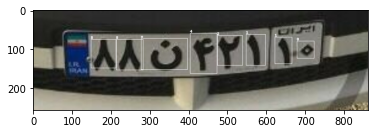

In [ ]:
#random.seed(22)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size

    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h

    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]

    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[int(obj_cls)])

    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")#[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("txtlabel", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
!mkdir images/train images/val images/test labels/train labels/val labels/test

In [ ]:
#Utility function to copy images
def copy_files_to_folder(list_of_files, destination_folder):
    for f in tqdm(list_of_files):
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

# copy the splits into their folders
copy_files_to_folder(train_images, 'images/train')
copy_files_to_folder(val_images, 'images/val/')
copy_files_to_folder(test_images, 'images/test/')
copy_files_to_folder(train_annotations, 'labels/train/')
copy_files_to_folder(val_annotations, 'labels/val/')
copy_files_to_folder(test_annotations, 'labels/test/')

100%|██████████| 509/509 [00:00<00:00, 8267.73it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12396, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 12396 (delta 4), reused 13 (delta 2), pack-reused 12380
Receiving objects: 100% (12396/12396), 12.18 MiB | 29.08 MiB/s, done.
Resolving deltas: 100% (8547/8547), done.


In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
a=[]
for i in range(len(class_id_to_name_mapping)):
    a.append(class_id_to_name_mapping[i])
a=np.transpose(a)
import yaml

article_info = [{'train': 'content/car-persian-plate-detection/images/train/', 'val': 'content/car-persian-plate-detection/images/val/', 'test': 'content/car-persian-plate-detection/images/test/', 'nc': 37, 'names': f'{a}'}]

with open("data/car-persian-plate-detection.yaml", 'w') as yamlfile:
    data = yaml.dump(article_info, yamlfile)
    print("Write successful")

Write successful


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp /content/yolov5/data/hyps/hyp.scratch-med.yaml --batch 32 --epochs 50 --data /content/yolov5/data/car-persian-plate-detection.yaml --weights yolov5s.pt --workers 24 --name yolo_plate_detection


train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/yolov5/data/car-persian-plate-detection.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-med.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_plate_detection, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=

In [ ]:
!python detect.py --source /content/images/test  --weights /content/yolov5/runs/train/yolo_plate_detection/weights/best.pt --conf 0.25 --name yolo_persian_plate_detection_test

detect: weights=['/content/yolov5/runs/train/yolo_plate_detection/weights/best.pt'], source=/content/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_persian_plate_detection_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
image 1/509 /content/images/test/1003.jpg: 416x640 1 1, 4 5s, 2 6s, 1 v, Done. (0.018s)
image 2/509 /content/images/test/1012.jpg: 416x640 1 2, 2 3s, 1 5, 1 7, 2 8s, 1 v, Done. (0.011s)
image 3/509 /content/images/test/1019.jpg: 192x640 2 2s, 1 3, 1 4, 1 6, 1 7, 1 9, 1 ta, Done. (0.015s)
image

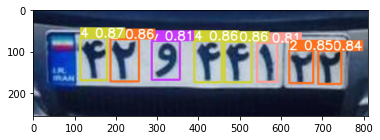

In [ ]:
detections_dir = "/content/yolov5/runs/detect/yolo_persian_plate_detection_test2"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp -av '/content/images' '/gdrive/MyDrive/platedetection/car-persian-plate-detection'

Streaming output truncated to the last 5000 lines.
'/content/images/train/3620.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/3620.jpg'
'/content/images/train/1258.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/1258.jpg'
'/content/images/train/2448.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/2448.jpg'
'/content/images/train/3144.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/3144.jpg'
'/content/images/train/1332.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/1332.jpg'
'/content/images/train/2220.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/2220.jpg'
'/content/images/train/3885.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/3885.jpg'
'/content/images/train/5267.jpg' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/images/train/5267.jp

In [ ]:
!cp -av '/content/labels' '/gdrive/MyDrive/platedetection/car-persian-plate-detection'

Streaming output truncated to the last 5000 lines.
'/content/labels/train/2448.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/2448.txt'
'/content/labels/train/3144.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/3144.txt'
'/content/labels/train/1332.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/1332.txt'
'/content/labels/train/2220.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/2220.txt'
'/content/labels/train/3885.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/3885.txt'
'/content/labels/train/5267.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/5267.txt'
'/content/labels/train/1654.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/1654.txt'
'/content/labels/train/191.txt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/labels/train/191.txt'

In [ ]:
!cp -av '/content/yolov5/runs' '/gdrive/MyDrive/platedetection/car-persian-plate-detection'

'/content/yolov5/runs' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs'
'/content/yolov5/runs/train' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train'
'/content/yolov5/runs/train/yolo_plate_detection' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection'
'/content/yolov5/runs/train/yolo_plate_detection/weights' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights'
'/content/yolov5/runs/train/yolo_plate_detection/weights/last.pt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights/last.pt'
'/content/yolov5/runs/train/yolo_plate_detection/weights/best.pt' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_plate_detection/weights/best.pt'
'/content/yolov5/runs/train/yolo_plate_detection/hyp.yaml' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/runs/train/yolo_pl

In [ ]:
!cp -av '/content/yolov5/data/car-persian-plate-detection.yaml' '/gdrive/MyDrive/platedetection/car-persian-plate-detection'

'/content/yolov5/data/car-persian-plate-detection.yaml' -> '/gdrive/MyDrive/platedetection/car-persian-plate-detection/car-persian-plate-detection.yaml'
